# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'CAL29'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 116)


,ASG002_CAL29_24H:A10,ASG002_CAL29_24H:A11,ASG002_CAL29_24H:A12,ASG002_CAL29_24H:A19,ASG002_CAL29_24H:A20,ASG002_CAL29_24H:A21,ASG002_CAL29_24H:B03,ASG002_CAL29_24H:B10,ASG002_CAL29_24H:B11,ASG002_CAL29_24H:B12,...,MOAR011_CAL29_24H:C03,MOAR011_CAL29_24H:C10,MOAR011_CAL29_24H:C11,MOAR011_CAL29_24H:C12,MOAR011_CAL29_24H:F07,MOAR011_CAL29_24H:F08,MOAR011_CAL29_24H:F09,MOAR011_CAL29_24H:J10,MOAR011_CAL29_24H:J11,MOAR011_CAL29_24H:J12
Androgen,0.152160,0.097523,0.012847,-0.011976,-0.005852,0.169808,-0.092257,-0.089685,0.048616,-0.022541,...,-0.020817,-0.114422,-0.064818,-0.028792,0.024373,0.056355,-0.147067,-0.530481,-0.142791,-0.027362
CDK1,-0.544250,-0.486959,0.002620,-0.362068,-0.083084,-0.304342,-0.242960,-0.054704,-1.090885,0.068311,...,0.012590,0.056357,0.126355,0.136386,0.214501,0.206556,0.112899,0.160342,-0.087312,0.062883
CDK2,-0.504709,-0.272260,-0.135991,-0.035246,-0.050079,-0.085287,-0.109929,0.079340,0.219810,0.045842,...,0.014247,0.062669,0.057704,0.062982,-0.613299,-0.041702,0.006097,0.067062,0.022859,0.024612
CDK4_6,-0.513443,-0.660043,-0.235080,-0.055200,-0.104365,-0.276962,-0.447950,-0.333068,-0.128469,-0.207933,...,0.031670,0.074899,-0.075027,0.021356,0.336626,0.453178,0.514444,0.567270,0.528933,0.616617
EGFR,-0.610670,-0.752345,-0.379766,-1.996730,-0.320969,-0.548347,-0.312526,-0.433805,-0.146186,-0.340657,...,0.150080,0.190731,0.064325,0.150629,0.436094,0.231789,0.307262,0.167975,0.178589,0.312841
Estrogen,-0.619334,0.043641,0.196259,0.114718,-0.194744,-0.032293,-0.110039,-0.196947,-0.084126,-0.360623,...,0.070595,0.191209,-0.077533,-0.004779,0.198966,0.191316,0.136817,0.175906,0.108802,0.196473
FGFR,0.294811,0.226360,0.094886,0.237472,0.234560,0.370235,0.113200,-0.075673,-0.145273,-0.109905,...,0.034334,-0.064146,0.055450,0.119495,-0.556095,-0.107553,0.004986,-0.042794,-0.024351,0.018551
PI3K,-1.996880,-1.738019,-1.453543,-1.682483,-1.310247,-0.584451,-0.420986,-0.559980,0.056233,-0.368948,...,0.361154,0.377587,0.171491,0.417961,0.567898,0.003916,-0.034977,0.177039,0.347442,0.136062
p53,-0.139016,0.178895,0.122560,-0.874826,-0.325811,-0.706753,-0.109167,-1.587738,-1.301870,-1.375538,...,0.397419,-0.172537,0.091509,0.257989,-0.134169,-0.050809,-0.083527,-0.569273,0.140900,0.079549
TOP2A,-1.423266,-0.116876,0.111838,0.054138,0.214872,-0.219102,-0.396501,-0.209230,-0.158261,-0.377757,...,-0.081268,0.198557,-0.011056,0.047562,0.159335,0.153768,0.066216,0.167720,0.118969,0.195748


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-25.588561156828696
25.471256736543687


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 116)
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
Androgen,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [8]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [9]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [10]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0
CDK2,0.0,0.172641,0.0,1.000000,0.069963,0.137381,0.914134,0.168707,0.0,0.008317,0.0,0.0,0.0
CDK4_6,0.0,0.000000,1.0,0.000000,1.000000,0.142206,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0
EGFR,0.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.942869,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,1.0,0.000000,1.000000,0.413125,0.008215,0.000000,0.0,1.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.085745,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000e+00,0.000000e+00,1.110223e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK1,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554312e-15,0.000000e+00,1.554312e-15,0.0,0.0,0.0
CDK2,0.0,3.779365e-01,0.000000e+00,4.440892e-16,2.550843e-01,3.442493e-01,2.801666e-01,3.744930e-01,0.000000e+00,9.081827e-02,0.0,0.0,0.0
CDK4_6,0.0,0.000000e+00,8.881784e-16,0.000000e+00,8.881784e-16,3.492611e-01,0.000000e+00,0.000000e+00,0.000000e+00,8.881784e-16,0.0,0.0,0.0
EGFR,0.0,8.881784e-16,8.881784e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.881784e-16,0.000000e+00,0.000000e+00,0.0,0.0,0.0
Estrogen,0.0,2.320928e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.998401e-15,0.0,0.0,0.0
FGFR,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.887379e-15,0.000000e+00,0.0,0.0,0.0
PI3K,0.0,0.000000e+00,3.330669e-16,0.000000e+00,3.330669e-16,4.923948e-01,9.026447e-02,0.000000e+00,0.000000e+00,3.330669e-16,0.0,0.0,0.0
p53,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.881784e-16,0.000000e+00,8.881784e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
TOP2A,0.0,0.000000e+00,0.000000e+00,2.799871e-01,0.000000e+00,6.661338e-16,0.000000e+00,6.661338e-16,0.000000e+00,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.058666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126830,0.000000,0.246546,0.0,0.0,0.0
CDK2,0.0,0.028204,0.000000,0.368487,0.006450,-0.025002,0.155338,0.017779,0.000000,-0.001409,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.269427,0.000000,0.163193,0.027577,0.000000,0.000000,0.000000,0.551805,0.0,0.0,0.0
EGFR,0.0,0.225304,0.342901,0.000000,0.000000,0.000000,0.000000,0.298098,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.111442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.528553,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101352,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.277760,0.000000,0.250859,0.105517,-0.001455,0.000000,0.000000,0.403533,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.000000,0.224318,0.000000,0.366795,0.000000,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.009563,0.000000,0.410104,0.000000,0.162246,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000000,0.000000,0.011245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012940,0.000000,0.019226,0.0,0.0,0.0
CDK2,0.0,0.063777,0.000000,0.037190,0.024245,0.064546,0.056534,0.041116,0.000000,0.015691,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.028603,0.000000,0.015687,0.069033,0.000000,0.000000,0.000000,0.049467,0.0,0.0,0.0
EGFR,0.0,0.028309,0.029665,0.000000,0.000000,0.000000,0.000000,0.017390,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.039665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027654,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006805,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.040464,0.000000,0.024973,0.130724,0.016344,0.000000,0.000000,0.092540,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.000000,0.008808,0.000000,0.016591,0.000000,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.031551,0.000000,0.012401,0.000000,0.011787,0.000000,0.000000,0.0,0.0,0.0


In [11]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.007508,0.028712,0.069838,0.015748,0.028269,0.004608,0.016187,0.000467,0.061821,-1.033751e-17,1.577357e-16,-2.643911e-17
CDK1,-5.937570e-17,1.042884,0.098787,0.041119,0.066363,0.225641,0.015585,0.233843,0.001580,0.493296,-8.325487e-17,-9.451866e-17,2.255460e-16
CDK2,8.813757e-17,0.078150,1.196637,0.444779,0.117624,0.160603,0.192862,0.131292,0.019547,0.400881,1.491406e-16,-1.949179e-16,-3.509508e-16
CDK4_6,-1.886048e-17,0.127982,0.489417,1.190421,0.268429,0.481865,0.078544,0.275923,0.007961,1.053780,-1.800886e-17,-1.107494e-16,4.945670e-16
EGFR,-2.125227e-17,0.307837,0.593267,0.223685,1.163533,0.259822,0.094986,0.482514,0.009627,0.530531,-8.237080e-17,-5.052519e-16,-6.185406e-16
Estrogen,1.557500e-18,0.166134,0.076231,0.036270,0.050933,1.368496,0.012032,0.176389,0.001220,0.855368,-5.612422e-17,-5.162215e-17,8.278653e-16
FGFR,1.504653e-17,0.007269,0.014009,0.005282,0.027474,0.006135,1.040854,0.011394,0.105493,0.012527,-4.450968e-17,2.711030e-17,1.818982e-16
PI3K,8.412271e-18,0.154556,0.539022,0.207667,0.363127,0.516315,0.085013,1.290877,0.008616,0.945750,4.546592e-16,-2.461412e-16,7.105744e-16
p53,-1.887376e-19,0.071719,0.138219,0.052114,0.271079,0.060533,0.403087,0.112416,1.040854,0.123602,-4.951483e-16,-1.138569e-16,2.468638e-17
TOP2A,-6.082535e-17,0.094432,0.123397,0.059951,0.082371,0.649604,0.019479,0.284416,0.001974,1.514311,5.598675e-16,-2.897574e-16,-1.074432e-15


In [12]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK4_6,Androgen,0.058666
1,PI3K,CDK1,0.126830
2,TOP2A,CDK1,0.246546
3,CDK1,CDK2,0.028204
4,CDK4_6,CDK2,0.368487
5,EGFR,CDK2,0.006450
6,Estrogen,CDK2,-0.025002
7,FGFR,CDK2,0.155338
8,PI3K,CDK2,0.017779
9,TOP2A,CDK2,-0.001409


In [13]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.000000,0.058666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126830,0.000000,0.246546,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.000000,0.368487,0.000000,0.000000,0.155338,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.269427,-1.000000,0.163193,0.000000,0.000000,0.000000,0.000000,0.551805,0.0,0.0,0.0
EGFR,0.0,0.225304,0.342901,0.000000,-1.000000,0.000000,0.000000,0.298098,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.111442,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.528553,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.101352,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.277760,0.000000,0.250859,0.000000,0.000000,-1.000000,0.000000,0.403533,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.000000,0.224318,0.000000,0.366795,0.000000,-1.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.000000,0.410104,0.000000,0.162246,0.000000,-1.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.007508,0.028712,0.069838,0.015748,0.028269,0.004608,0.016187,0.000467,0.061821,-1.033751e-17,1.577357e-16,-2.643911e-17
CDK1,-5.937570e-17,1.042884,0.098787,0.041119,0.066363,0.225641,0.015585,0.233843,0.001580,0.493296,-8.325487e-17,-9.451866e-17,2.255460e-16
CDK2,8.813757e-17,0.078150,1.196637,0.444779,0.117624,0.160603,0.192862,0.131292,0.019547,0.400881,1.491406e-16,-1.949179e-16,-3.509508e-16
CDK4_6,-1.886048e-17,0.127982,0.489417,1.190421,0.268429,0.481865,0.078544,0.275923,0.007961,1.053780,-1.800886e-17,-1.107494e-16,4.945670e-16
EGFR,-2.125227e-17,0.307837,0.593267,0.223685,1.163533,0.259822,0.094986,0.482514,0.009627,0.530531,-8.237080e-17,-5.052519e-16,-6.185406e-16
Estrogen,1.557500e-18,0.166134,0.076231,0.036270,0.050933,1.368496,0.012032,0.176389,0.001220,0.855368,-5.612422e-17,-5.162215e-17,8.278653e-16
FGFR,1.504653e-17,0.007269,0.014009,0.005282,0.027474,0.006135,1.040854,0.011394,0.105493,0.012527,-4.450968e-17,2.711030e-17,1.818982e-16
PI3K,8.412271e-18,0.154556,0.539022,0.207667,0.363127,0.516315,0.085013,1.290877,0.008616,0.945750,4.546592e-16,-2.461412e-16,7.105744e-16
p53,-1.887376e-19,0.071719,0.138219,0.052114,0.271079,0.060533,0.403087,0.112416,1.040854,0.123602,-4.951483e-16,-1.138569e-16,2.468638e-17
TOP2A,-6.082535e-17,0.094432,0.123397,0.059951,0.082371,0.649604,0.019479,0.284416,0.001974,1.514311,5.598675e-16,-2.897574e-16,-1.074432e-15


In [14]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

130

In [15]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

26

### Visualization

In [19]:
df_subset=rm_filt_minus_inv[[ 'CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]
df_subset = df_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]

In [20]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of CAL29 cell line under conditions ')

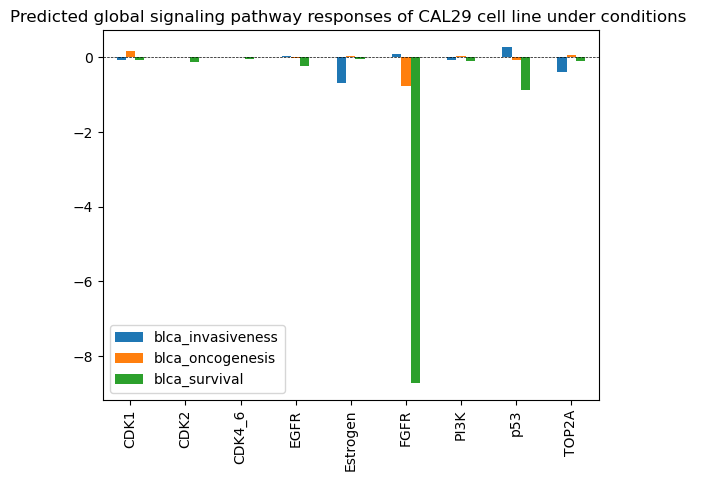

In [21]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [22]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.000000,0.058666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126830,0.000000,0.246546,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.000000,0.368487,0.000000,0.000000,0.155338,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.000000,0.269427,-1.000000,0.163193,0.000000,0.000000,0.000000,0.000000,0.551805,0.0,0.0,0.0
EGFR,0.0,0.225304,0.342901,0.000000,-1.000000,0.000000,0.000000,0.298098,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.111442,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.528553,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.101352,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.277760,0.000000,0.250859,0.000000,0.000000,-1.000000,0.000000,0.403533,0.0,0.0,0.0
p53,0.0,0.000000,0.000000,0.000000,0.224318,0.000000,0.366795,0.000000,-1.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.000000,0.410104,0.000000,0.162246,0.000000,-1.000000,0.0,0.0,0.0


In [23]:
rm_subset=rm_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_invasiveness,blca_oncogenesis,blca_survival
CDK1,0.000000,0.160989,0.000000
CDK2,0.000000,0.000000,0.000000
CDK4_6,0.000000,0.000000,0.000000
EGFR,0.000000,0.000000,0.000000
Estrogen,-0.511445,0.000000,0.000000
FGFR,0.000000,-0.749735,-8.384377
PI3K,0.000000,0.000000,0.000000
p53,0.270606,0.000000,0.000000
TOP2A,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of CAL29 cell line under conditions ')

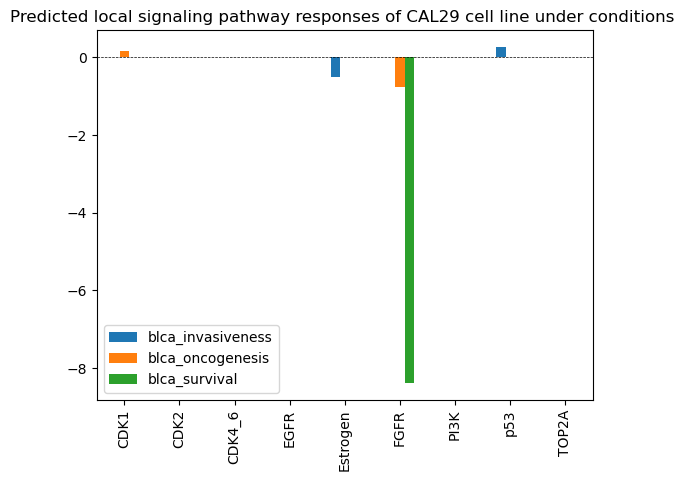

In [24]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")